<a href="https://colab.research.google.com/github/Anthonyyy16/Recommender-system/blob/main/Content_Based_Recommendation_Engines_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Movie Content Based Recommendation System

![image.png](attachment:image.png)

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
# credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [6]:
# credits.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
# print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Movies Dataframe: (4803, 20)


In [8]:
credits_column_renamed = movies_df.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

,budget_x,genres_x,homepage_x,id,keywords_x,original_language_x,original_title_x,overview_x,popularity_x,production_companies_x,...,production_countries_y,release_date_y,revenue_y,runtime_y,spoken_languages_y,status_y,tagline_y,title_y,vote_average_y,vote_count_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
print(movies_df_merge.columns)

Index(['budget_x', 'genres_x', 'homepage_x', 'id', 'keywords_x',
       'original_language_x', 'original_title_x', 'overview_x', 'popularity_x',
       'production_companies_x', 'production_countries_x', 'release_date_x',
       'revenue_x', 'runtime_x', 'spoken_languages_x', 'status_x', 'tagline_x',
       'title_x', 'vote_average_x', 'vote_count_x', 'budget_y', 'genres_y',
       'homepage_y', 'keywords_y', 'original_language_y', 'original_title_y',
       'overview_y', 'popularity_y', 'production_companies_y',
       'production_countries_y', 'release_date_y', 'revenue_y', 'runtime_y',
       'spoken_languages_y', 'status_y', 'tagline_y', 'title_y',
       'vote_average_y', 'vote_count_y'],
      dtype='object')


In [60]:
# Drop only unnecessary columns, keeping the necessary ones for weighted average calculation
columns_to_drop = [
    'budget_x', 'budget_y',
    'production_companies_x', 'production_companies_y', 'release_date_x',
    'release_date_y', 'overview_y'  # Only drop overview_y, keep overview_x
]

# Apply the drop operation
movies_cleaned_df = movies_df_merge.drop(columns=columns_to_drop)

# Check if 'vote_average' and 'vote_count' exist in the remaining columns
# If not, assign these back using available data

if 'vote_average' not in movies_cleaned_df.columns:
    movies_cleaned_df['vote_average'] = movies_df_merge['vote_average_x']

if 'vote_count' not in movies_cleaned_df.columns:
    movies_cleaned_df['vote_count'] = movies_df_merge['vote_count_x']




In [14]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genres_x                4803 non-null   object 
 1   homepage_x              1712 non-null   object 
 2   id                      4803 non-null   int64  
 3   keywords_x              4803 non-null   object 
 4   original_language_x     4803 non-null   object 
 5   popularity_x            4803 non-null   float64
 6   production_countries_x  4803 non-null   object 
 7   revenue_x               4803 non-null   int64  
 8   runtime_x               4801 non-null   float64
 9   spoken_languages_x      4803 non-null   object 
 10  status_x                4803 non-null   object 
 11  tagline_x               3959 non-null   object 
 12  title_x                 4803 non-null   object 
 13  vote_count_x            4803 non-null   int64  
 14  genres_y                4803 non-null   

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [24]:
movies_cleaned_df.head()['overview_x']

,overview_x
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview_y'] = movies_cleaned_df['overview_x'].fillna('')

# Verify the DataFrame and its columns
print(movies_cleaned_df.columns)

# Print the first few rows to inspect
print(movies_cleaned_df.head())

# Ensure 'overview' is a column in movies_cleaned_df
if 'overview_x' not in movies_cleaned_df.columns:
    raise ValueError("The 'overview' column is missing from the DataFrame.")


Index(['genres_x', 'homepage_x', 'id', 'keywords_x', 'original_language_x',
       'original_title_x', 'overview_x', 'popularity_x',
       'production_countries_x', 'revenue_x', 'runtime_x',
       'spoken_languages_x', 'status_x', 'tagline_x', 'title_x',
       'vote_count_x', 'genres_y', 'homepage_y', 'keywords_y',
       'original_language_y', 'popularity_y', 'production_countries_y',
       'revenue_y', 'runtime_y', 'spoken_languages_y', 'status_y', 'tagline_y',
       'title_y', 'vote_count_y', 'overview_y'],
      dtype='object')
                                            genres_x  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                     homepage_x      id  \
0                   http://www.avatarmovie.com/   19995   
1 

In [33]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview_y'])

In [34]:
tfv_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [35]:
tfv_matrix.shape

(4803, 10417)

In [36]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [37]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [39]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title_x']).drop_duplicates()

In [40]:
indices

,0
original_title_x,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [41]:
indices['Newlyweds']

4799

In [42]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [43]:
list(enumerate(sig[indices['Newlyweds']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615943791623508),
 (3, 0.7615945564232902),
 (4, 0.7615945779342556),
 (5, 0.7615943267971559),
 (6, 0.7615948190414071),
 (7, 0.761594346971664),
 (8, 0.7615943903358866),
 (9, 0.761594688255891),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615943548130525),
 (17, 0.761594965420998),
 (18, 0.7615942819944952),
 (19, 0.7615945082445131),
 (20, 0.7615942928381602),
 (21, 0.7615949832832596),
 (22, 0.7615941559557649),
 (23, 0.761594428370306),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615944537585686),
 (28, 0.7615941559557649),
 (29, 0.7615943053510925),
 (30, 0.7615943361754078),
 (31, 0.76159445046522),
 (32, 0.7615941559557649),
 (33, 0.7615944286938301),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761594394

In [44]:
sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

[(4799, 0.7616344692549826),
 (616, 0.7616048159533783),
 (2689, 0.7616040118828756),
 (869, 0.7616023446645636),
 (3969, 0.7615999241031715),
 (1576, 0.761599897054374),
 (2290, 0.7615997916001525),
 (1032, 0.7615997293504287),
 (3145, 0.7615995818321376),
 (2531, 0.7615992277356394),
 (504, 0.7615991572658852),
 (866, 0.7615986885689172),
 (1157, 0.7615985018709569),
 (2962, 0.7615983449381306),
 (242, 0.7615982589231822),
 (4576, 0.761598216183433),
 (1223, 0.761598205140339),
 (3479, 0.7615982040456052),
 (2586, 0.7615979971714508),
 (2688, 0.7615979281286247),
 (3155, 0.7615979184287897),
 (2869, 0.7615978888434758),
 (3559, 0.7615978829960376),
 (4641, 0.7615978736478359),
 (1632, 0.7615977959513462),
 (4616, 0.7615977247067919),
 (1071, 0.7615977198249168),
 (3393, 0.7615976461979505),
 (1970, 0.7615974163030651),
 (1856, 0.7615973809810894),
 (1385, 0.7615973007946545),
 (3583, 0.7615972678262316),
 (4591, 0.7615971603170043),
 (1110, 0.761597151119841),
 (237, 0.76159707908666

In [47]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title_x'].iloc[movie_indices]

In [48]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Avatar')

,original_title_x
1341,Obitaemyy Ostrov
634,The Matrix
3604,Apollo 18
2130,The American
775,Supernova
529,Tears of the Sun
151,Beowulf
311,The Adventures of Pluto Nash
847,Semi-Pro
942,The Book of Life


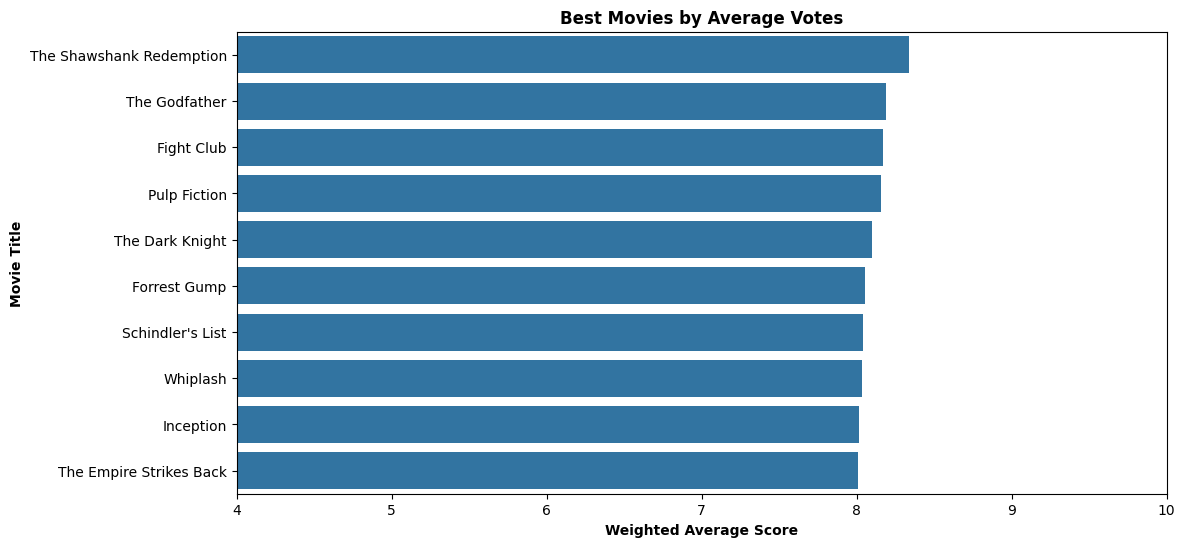

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Proceed with calculating the weighted average
C = movies_cleaned_df['vote_average'].mean()
m = movies_cleaned_df['vote_count'].quantile(0.70)

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

movies_cleaned_df['weighted_average'] = movies_cleaned_df.apply(weighted_rating, axis=1)

# Proceed with the plotting code as before
weight_average = movies_cleaned_df.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(12, 6))
axis1 = sns.barplot(x=weight_average['weighted_average'].head(10),
                    y=weight_average['original_title_x'].head(10),
                    data=weight_average)

plt.xlim(4, 10)
plt.title('Best Movies by Average Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')
plt.show()